# (2) Creating a Dictionary-based Sentiment Analyzer

## 1. Load in the small corpus csv

Load data from small corpus for 5 ratings into one dataframe

In [1]:
import pandas as pd

df = pd.DataFrame()
for i in range(1, 6):    
    dfsub = pd.read_csv('data/small_rating_{}.csv'.format(i))
    df = pd.DataFrame.append(df, dfsub)

In [2]:
df.head()

reviewText  overall
0  The game is great, 5 stars, but anyone paying ...      1.0
1  We had this on pre-order for 2 years. Forza 5 ...      1.0
2  Despite my having a high-powered PC, the game ...      1.0
3  No Yao Ming, Michael Redd, Tayshaun Prince etc...      1.0
4  Love this game series. Love playing GTA Libert...      1.0

In [3]:
df.tail()

reviewText  overall
1495  Absolutely amazing, I love this game as I did ...      5.0
1496  Have ahd this for a while now (1yr+) still goi...      5.0
1497                                  Owned it for Xbox      5.0
1498  A nice way to have some old-school fun.  I pla...      5.0
1499  The words retro and nostalgic almost go hand-i...      5.0

In [4]:
df.describe()

overall
count  4500.000000
mean      3.000000
std       1.699862
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       5.000000

## 2. Tokenize the sentences and words of the reviews with the tokenize module of NLTK

Download and import NTLK module

In [5]:
import nltk
#nltk.download('punkt')

In [6]:
import nltk.tokenize

Try out sent_tokenize and word_tokenize

In [7]:
review = df.iloc[0]["reviewText"]

In [8]:
review

"The game is great, 5 stars, but anyone paying $350-$400+ dollars for the Wizard's Edition is insane.  The only thing that is really nice to have while playing the game is the hardcover version of the Wizard's Companion.  But is that really worth an extra $300+ dollars!!!  Especially when you can download a pdf of the complete English Wizard's Guide for free, and then bring it to Kinko's and have them spiral bind it for $20.\n\nAs for the cute doll and artwork, understand this is not a collectable that will go up in value, a year from now you will be able to buy a Wizard's Edition for under $100.  So for now buy the regular game and either live with using the in game Wizard's Companion or get the pdf for free and view it on a tablet while playing or print it out for now (heck, an online binding service will make a hardcover version for you for less then $100) and then buy the full Wizard's Edition a year from now for a normal price."

In [9]:
review_sents = nltk.tokenize.sent_tokenize(review)

In [10]:
sent = review_sents[0]

In [11]:
sent

"The game is great, 5 stars, but anyone paying $350-$400+ dollars for the Wizard's Edition is insane."

In [12]:
words = nltk.tokenize.word_tokenize(sent)

In [13]:
words

['The',
 'game',
 'is',
 'great',
 ',',
 '5',
 'stars',
 ',',
 'but',
 'anyone',
 'paying',
 '$',
 '350-',
 '$',
 '400+',
 'dollars',
 'for',
 'the',
 'Wizard',
 "'s",
 'Edition',
 'is',
 'insane',
 '.']

## 3. Download the opinion lexicon of NLTK

In [14]:
#nltk.download('opinion_lexicon')

http://www.nltk.org/howto/corpus.html

In [15]:
from nltk.corpus import opinion_lexicon

In [16]:
opinion_lexicon.words()[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [17]:
opinion_lexicon.negative()[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [18]:
opinion_lexicon.positive()[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [19]:
len(opinion_lexicon.words())

6789

In [20]:
len(opinion_lexicon.negative())

4783

In [21]:
len(opinion_lexicon.positive())

2006

## 4. Classify each review in a scale of -1 to +1

Classify one sentence

In [22]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [72]:
import nltk.tokenize
from nltk.corpus import opinion_lexicon

# A simple sentiment classifier for a setence.
# Return a score on the scale -1 to 1.
# It counts number of positive and negative words
# and return the average score based on the difference.
def sentiment_score_sent(sent):
    pos = 0
    neg = 0
    for w in nltk.tokenize.word_tokenize(sent.lower()):
        if w in positive_words:
            pos += 1
        elif w in negative_words:
            neg += 1
    if pos + neg == 0:
        return 0
    return (pos - neg) / (pos + neg)

Classify one paragraph

In [24]:
import nltk.tokenize

# A simple sentiment classifier for a paragraph.
# Return a score on the scale -1 to 1.
# First it tokenizes the input text into many sentences,
# then compute sentiment score for each sentence.
# Finally it takes the average score of all the sentences.
def sentiment_score(text):
    try:
        sents = nltk.tokenize.sent_tokenize(text)
    except:
        print('fail to tokenize text:', str(text))
        return 0

    scores = [sentiment_score_sent(sent) for sent in sents]
    total = sum(scores)
    if len(scores) == 0:
        return 0
    elif total == 0:
        return 0
    return total/len(scores)    

Now, classify all reviews in the input.
Note: NLTK opinion lexicon neither contains uppercase words, nor punctuation marks.

In [25]:
sentiment_score(df.iloc[10]['reviewText'])

0.3333333333333333

In [26]:
df['sentiment_score'] = df['reviewText'].apply(sentiment_score)

fail to tokenize text: nan


In [27]:
df.head(10)

reviewText  overall  sentiment_score
0  The game is great, 5 stars, but anyone paying ...      1.0         0.666667
1  We had this on pre-order for 2 years. Forza 5 ...      1.0         0.194444
2  Despite my having a high-powered PC, the game ...      1.0        -0.500000
3  No Yao Ming, Michael Redd, Tayshaun Prince etc...      1.0        -0.500000
4  Love this game series. Love playing GTA Libert...      1.0         0.121212
5  Got these today expecting what the image showe...      1.0        -0.200000
6                            One Word Review :BORING      1.0        -1.000000
7                   Wouldn't install not compatible.      1.0         1.000000
8  Cable stopped working after a few months. Only...      1.0         0.333333
9  I am a real big fan of all the Soulcalibur gam...      1.0         0.050000

In [28]:
df.tail(10)

reviewText  overall  \
1490                               It worked very well!      5.0   
1491  WOW!\nPaperboy, Gauntlet, Crystal Castles, Mar...      5.0   
1492                                      Kids love it!      5.0   
1493  I never owned it until now. Played all the dem...      5.0   
1494  Work great, as good as expected for any online...      5.0   
1495  Absolutely amazing, I love this game as I did ...      5.0   
1496  Have ahd this for a while now (1yr+) still goi...      5.0   
1497                                  Owned it for Xbox      5.0   
1498  A nice way to have some old-school fun.  I pla...      5.0   
1499  The words retro and nostalgic almost go hand-i...      5.0   

      sentiment_score  
1490         1.000000  
1491         0.411765  
1492         1.000000  
1493        -0.333333  
1494         1.000000  
1495         1.000000  
1496         1.000000  
1497         0.000000  
1498         1.000000  
1499        -0.216049

## 5. Compare the scores of the product reviews with the product ratings

Use Altair to plot charts

https://pbpython.com/altair-intro.html

In [29]:
import altair as alt

### 5.1. Plot distribution of ratings

https://stackoverflow.com/questions/54918651/controlling-bin-widths-in-altair

In [30]:
alt.Chart(df).mark_bar().encode(
    alt.X('overall', bin=alt.Bin(extent=[1.0, 6.0], step=1.0), type='quantitative'),
    y='count()',
)

alt.Chart(...)

### 5.2. Plot distribution of sentiment score using numpy

In [31]:
import numpy as np
from matplotlib import pyplot as plt

#matplotlib inline

In [32]:
senti_scores = df["sentiment_score"].tolist()
senti_scores_hist = np.histogram(senti_scores, bins=5)

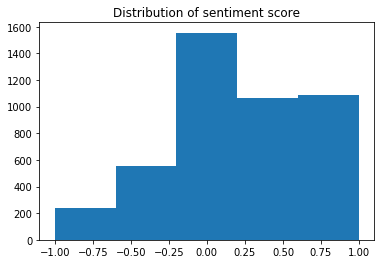

In [33]:
plt.hist(
    df["sentiment_score"].tolist(),
    bins = senti_scores_hist[1],
    histtype='bar')
plt.title("Distribution of sentiment score") 
plt.show()

### 5.3. Create a plot about the relation of the sentiment scores and product ratings

https://altair-viz.github.io/gallery/scatter_tooltips.html

https://altair-viz.github.io/gallery/binned_scatterplot.html

In [34]:
alt.Chart(df).mark_circle().encode(
    alt.X('overall'),
    alt.Y('sentiment_score', bin=True),
    size='count()'
)

alt.Chart(...)

## 6. Measure the correlation of the sentiment scores and product ratings

Pearson correlation assumes normal distribution of the variables, and looks for linear correlation

In [35]:
from scipy.stats import pearsonr

In [38]:
pearson_corr, _ = pearsonr(df["sentiment_score"].tolist(), df["overall"].tolist())

In [39]:
pearson_corr

0.5218194091345513

Spearman correlation looks for monotonic correlation

In [40]:
from scipy.stats import spearmanr

In [42]:
spearman_corr, _ = spearmanr(df["sentiment_score"].tolist(), df["overall"].tolist())

In [43]:
spearman_corr

0.5327122103254984

Examine low score reviews with high sentiment score !!!

https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/

In [49]:
df.query('sentiment_score == 1 and overall == 1').head(10)["reviewText"].tolist()

["Wouldn't install not compatible.",
 "I'm sure I would like the game had I not paid Amazon for the game then I spend a long time getting it downloaded only to be advised I'd have to pay for it yet again to the tune of an additional $9.99 for the key code..... so no I can't say I like this game.",
 'The Controller Looked  used and did not charge the battery with a Microsoft play and charge kit and the rumbles were too soft too the touch I returned.',
 'I am not able to use it because the PS4 I ordered did not work, so I am not able to give a rating.',
 'Christmas gift for our son, we are sure he will love it',
 'dont support scalpers',
 'Achievement hunters only need apply.',
 'ordered 2....One did not work immediately...Another was sent...All stopped working within 2 weeks',
 'Did not work at all on genuine N64 with various controllers.',
 'Avoid this game save your money or throw it in the street it would be more fun than this.']

In [50]:
df.query('sentiment_score == 1 and overall == 2').head(10)["reviewText"].tolist()

['this would be fun game but I cant seem to play it on the current format of my computer I will ask how but you have no help line',
 "Worked on occasion, sometimes when I put the disk in the console told me that if I wanted to play the game I needed to put it in an xbox 360, but that's exactly what it was in",
 "Didn't like it",
 'did not like it',
 "Sega nomad just wasn't made right when you go to do something it resets and where you plug in the power cord its on top and they did a better job on the game gear",
 'Not too great',
 'Fine',
 'This product should have come with a flexible arm that is adjustable, not all ear sizes are the same and it does not fit a small ear nor can it be adjusted.',
 'Not the best game but fun to play when passing time',
 "the shoulder buttons don't work"]

Examine hight score reviews with low sentiment score !!!

In [54]:
df.query('sentiment_score == -1 and overall == 5').head(20)["reviewText"].tolist()

["I'm giving this 5 stars because I'm not sure if I missed a detail or two, but upon receiving this, I was surprised that the game did not come in the collectors tin. However, no harm done since I had the case from putting a $5 down on a preorder, but ended up cancelling it. Just be warned you probably will NOT get the collectors tin as shown!",
 'Very funny',
 'Just spend the extra couple of bucks to have one big memory card that way u are not messing around with multiple memory cards!',
 "when u play GTA you will notice why the have became a GH from PS3 this game mare the real life of a criminal that doesn't want it but killing robbing and shooting is the only thing the know to do.",
 'Just what my grandson wanted to replace one that was broken and it arrived on time for Easter, for a special gift',
 'I have been using this receiver on my pc for a few months now and have had zero issues with it detecting my xbox controller and staying connected.',
 'Very Funny',
 'Cheap but gets the 

## 7. Improve your sentiment analyzer in order to reduce contradictory cases

https://kite.com/python/docs/nltk.sentiment.util.mark_negation

In [55]:
from nltk.sentiment import util

In [60]:
util.mark_negation(nltk.tokenize.word_tokenize("wouldn't install not compatible."))

['would', "n't", 'install_NEG', 'not_NEG', 'compatible_NEG', '.']

Add more words from positive set to negative set by adding '_NEG'

In [67]:
negative_words_with_neg = negative_words.copy()
negative_words_with_neg.update(['{}_NEG'.format(w) for w in positive_words])

In [69]:
print(len(positive_words), len(negative_words), len(negative_words_with_neg))

2006 4783 6789


Revise the scoring algorithms

In [71]:
import nltk.tokenize

# Revised simple sentiment classifier for a setence.
# Leverage mark_negation
# Return a score on the scale -1 to 1.
# It counts number of positive and negative words
# and return the average score based on the difference.
def sentiment_score_sent_v2(sent):
    pos = 0
    neg = 0
    tokens = util.mark_negation(nltk.tokenize.word_tokenize(sent.lower()))
    for w in tokens:
        if w in positive_words:
            pos += 1
        elif w in negative_words_with_neg:
            neg += 1
    if pos + neg == 0:
        return 0
    return (pos - neg) / (pos + neg)

In [73]:
import nltk.tokenize

# Revised simple sentiment classifier for a paragraph.
# Return a score on the scale -1 to 1.
def sentiment_score_v2(text):
    try:
        sents = nltk.tokenize.sent_tokenize(text)
    except:
        print('fail to tokenize text:', str(text))
        return 0

    scores = [sentiment_score_sent_v2(sent) for sent in sents]
    total = sum(scores)
    if len(scores) == 0:
        return 0
    elif total == 0:
        return 0
    return total/len(scores)

## 8. Score the reviews again on the basis of new algorithm

In [81]:
for review in df.query('sentiment_score == 1 and overall == 1').head(20)["reviewText"].tolist():
    print(sentiment_score(review), sentiment_score_v2(review))

1.0 -1.0
1.0 0
1.0 -1.0
1.0 -1.0
1.0 1.0
1.0 -1.0
1.0 1.0
1.0 -1.0
1.0 -1.0
1.0 1.0
1.0 -1.0
1.0 1.0
1.0 -1.0
1.0 -1.0
1.0 -1.0
1.0 0.5
1.0 1.0
1.0 -1.0
1.0 -1.0
1.0 0


In [82]:
for review in df.query('sentiment_score == -1 and overall == 5').head(20)["reviewText"].tolist():
    print(sentiment_score(review), sentiment_score_v2(review))

-1.0 -0.3333333333333333
-1.0 -1.0
-1.0 0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 0
-1.0 -1.0
-1.0 -1.0
-1.0 0
-1.0 0
-1.0 -1.0


In [83]:
df['sentimentScore'] = df['reviewText'].apply(sentiment_score_v2)

fail to tokenize text: nan


## 9. Check whether your results improved

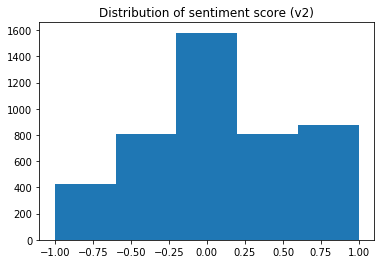

In [86]:
senti_scores_v2 = df["sentimentScore"].tolist()
senti_scores_hist_v2 = np.histogram(senti_scores, bins=5)
plt.hist(
    df["sentimentScore"].tolist(),
    bins = senti_scores_hist_v2[1],
    histtype='bar')
plt.title("Distribution of sentiment score (v2)") 
plt.show()

-> Many entries move from high score buckets to negative score (close to 0) buckets.

In [87]:
pearson_corr, _ = pearsonr(df["sentimentScore"].tolist(), df["overall"].tolist())

In [88]:
pearson_corr

0.6017876547098799

In [89]:
spearman_corr, _ = spearmanr(df["sentimentScore"].tolist(), df["overall"].tolist())

In [90]:
spearman_corr

0.6153632773090054

-> Correlation values improved.

## 10. Export your results to your data file

In [94]:
df1 = df.drop(columns=["sentiment_score"])

In [95]:
df1.head()

reviewText  overall  sentimentScore
0  The game is great, 5 stars, but anyone paying ...      1.0        0.666667
1  We had this on pre-order for 2 years. Forza 5 ...      1.0        0.138889
2  Despite my having a high-powered PC, the game ...      1.0       -0.500000
3  No Yao Ming, Michael Redd, Tayshaun Prince etc...      1.0        0.000000
4  Love this game series. Love playing GTA Libert...      1.0       -0.060606

In [96]:
df1.to_csv(
        "data/small_corpus_sentiment.csv",
        index=False)